<a href="https://colab.research.google.com/github/SunnyD50/Control-Substance-Overprescription-Tracker-/blob/main/Sunday_Stock__Mrkt__News__Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement

News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry.As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies. With an ever-rising number of news articles and opinions, an investment startup aims to leverage artificial intelligence to address the challenge of interpreting stock-related news and its impact on stock prices. They have collected historical daily news for a specific company listed under NASDAQ, along with data on its daily stock price and trade volumes.

The project tries to analyze these data, developing an AI-driven sentiment analysis system that will automatically process and analyze news articles to gauge market sentiment, and summarizing the news at a weekly level to enhance the accuracy of their stock price predictions and optimize investment strategies.

 This will empower  financial analysts with actionable insights, leading to more informed investment decisions and improved client outcomes.

Importing Necessary Liberaries

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.7 MB/s eta 0:00:00


In [ ]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stock_news = pd.read_csv('/content/drive/MyDrive/stock_news.csv')

In [ ]:
#Creating a copy of the dataset
stock = stock_news.copy()

Data Overview

In [ ]:
stock.head(5) # checking the 5 first row to ensre proper data load

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
stock.shape     # checking the shape of the data

(349, 8)

The data is made up of 349 rows and 8 columns



In [ ]:
stock.info() # check the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    349 non-null    object 
 1   News    349 non-null    object 
 2   Open    349 non-null    float64
 3   High    349 non-null    float64
 4   Low     349 non-null    float64
 5   Close   349 non-null    float64
 6   Volume  349 non-null    int64  
 7   Label   349 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ KB


Observations


*  The data type consist of object, float and int64



In [ ]:
#  converting the 'Date' column in the 'stock' DataFrame to datetime format.

import pandas as pd
stock['Date'] = pd.to_datetime(stock['Date'])


In [ ]:
stock.describe()

,Date,Open,High,Low,Close,Volume,Label
count,349,349.000000,349.000000,349.000000,349.000000,3.490000e+02,349.000000
mean,2019-02-16 16:05:30.085959936,46.229233,46.700458,45.745394,44.926317,1.289482e+08,-0.054441
min,2019-01-02 00:00:00,37.567501,37.817501,37.305000,36.254131,4.544800e+07,-1.000000
25%,2019-01-14 00:00:00,41.740002,42.244999,41.482498,40.246914,1.032720e+08,-1.000000
50%,2019-02-05 00:00:00,45.974998,46.025002,45.639999,44.596924,1.156272e+08,0.000000
75%,2019-03-22 00:00:00,50.707500,50.849998,49.777500,49.110790,1.511252e+08,0.000000
max,2019-04-30 00:00:00,66.817497,67.062500,65.862503,64.805229,2.444392e+08,1.000000
std,NaN,6.442817,6.507321,6.391976,6.398338,4.317031e+07,0.715119


In [ ]:

# Check for duplicate values
duplicate_rows = stock[stock.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])
duplicate_rows.head()


Number of duplicate rows: 0


,Date,News,Open,High,Low,Close,Volume,Label




*  No duplicate row observed in the data



In [ ]:
 # check for missing values in the data

stock.isnull().sum()


,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0




*  No missing values observed



Exploratory Data Analysis

Univariate Analysis

Observations on Label

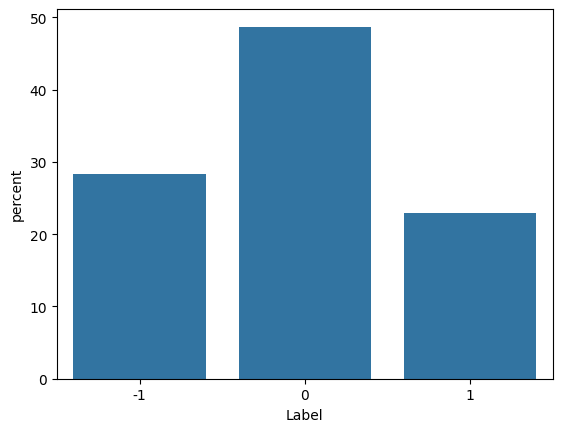

In [ ]:
sns.countplot(data=stock, x="Label", stat="percent");

Observations


* There is imbalance in the data distribution with highest label 0(Neutral) and lowest 1(Positive)



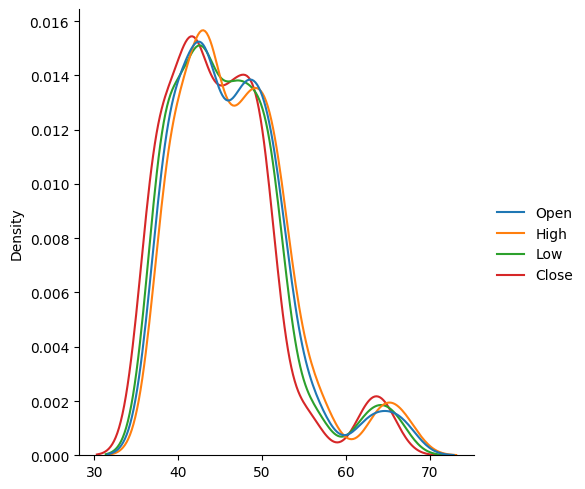

In [ ]:
## Density Plot of Price (Open,High,Low,Close)
#  ploting a density plot of ["Open","High","Low","Close"] all in a single plot

sns.displot(data=stock[["Open","High","Low","Close"]], kind="kde", palette="tab10");


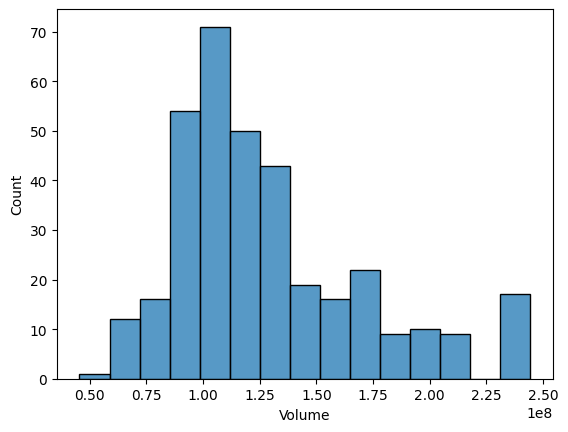

In [ ]:
#  plot a histogram of Volume

sns.histplot(stock, x='Volume');


In [ ]:
#Calculating the total number of words present in the news content using lambda function
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))

In [ ]:
# The statistical summary for the news content length

stock['news_len'].describe()


,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


The avarage news content lenmght is 49.3, maximum is 61.0 and the least is 19.0

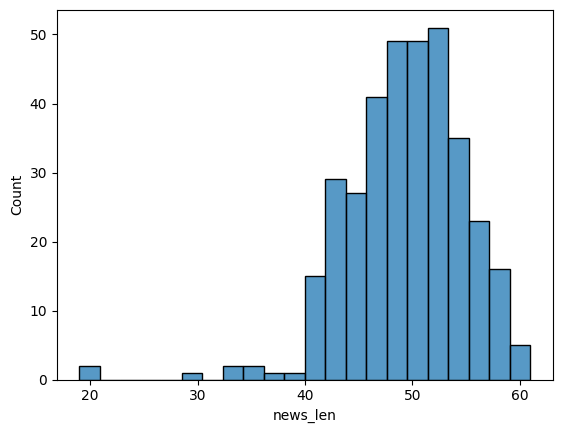

In [ ]:
#  plot a histogram of news_len column

sns.histplot(data=stock,x="news_len");


Bivariate Analysis

Correlation


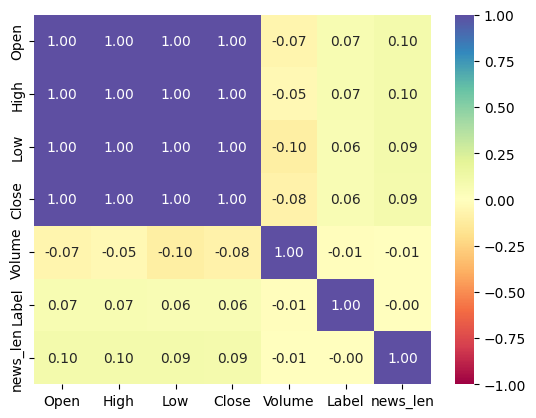

In [ ]:
#  plot the correlation matrix for numeric columns only.

import numpy as np
sns.heatmap(
    stock[stock.select_dtypes(include=np.number).columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);


Observations


*  There is a high corelaton between news lenght, close, low, high and open.



Label vs Price (Open, High, Low, Close)

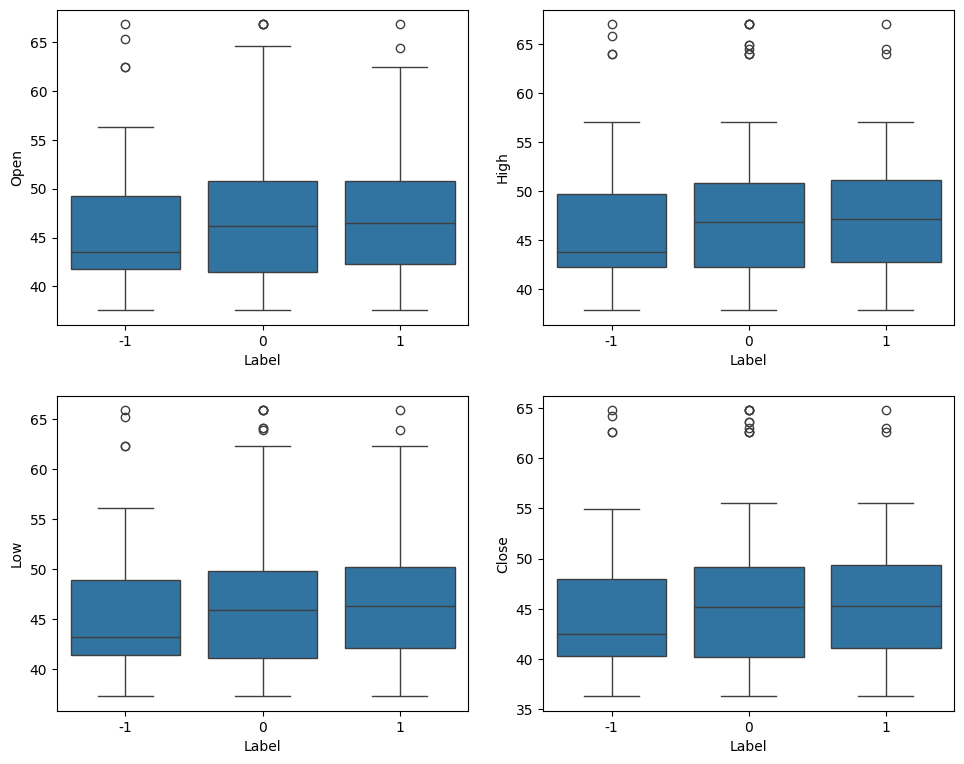

In [ ]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

Observations


*  There are some outliers in the label across open, close,low and high



In [ ]:
Label vs Volume

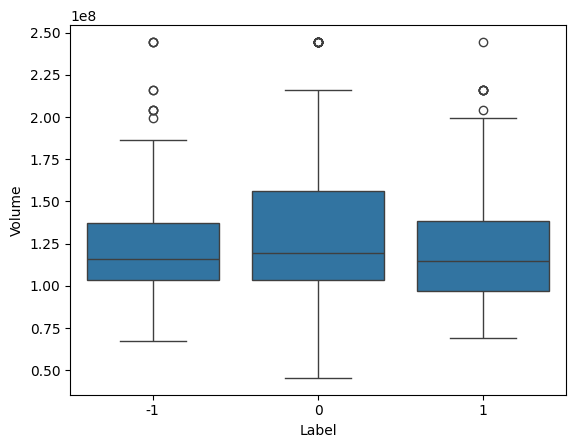

In [ ]:
#  plot a boxplot of Label vs Volume

sns.boxplot(
    data=stock, x="Label", y="Volume"  # Complete the code to plot a boxplot of Label vs Volume
);


Observations


*   Outliers are observed in the labal and volume with avarage arround 1.20



In [ ]:
## Date vs Price (Open, High, Low, Close)

In [ ]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


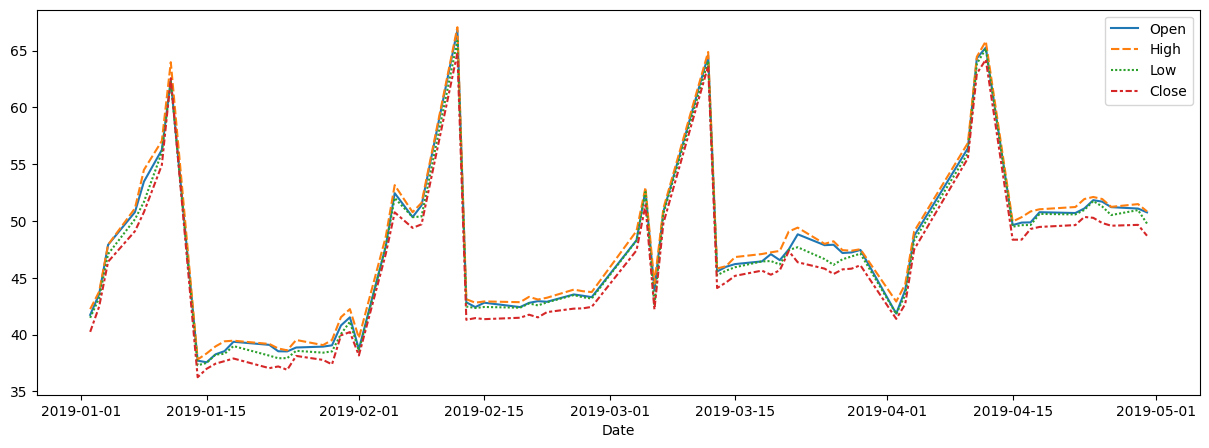

In [ ]:
#  plottting a lineplot of all the variables except Volume
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1));


Observation


*  There is high occilations with high aprox 70 and low in 38, also a divergent between open, high, low and close.



Volume vs Close Price

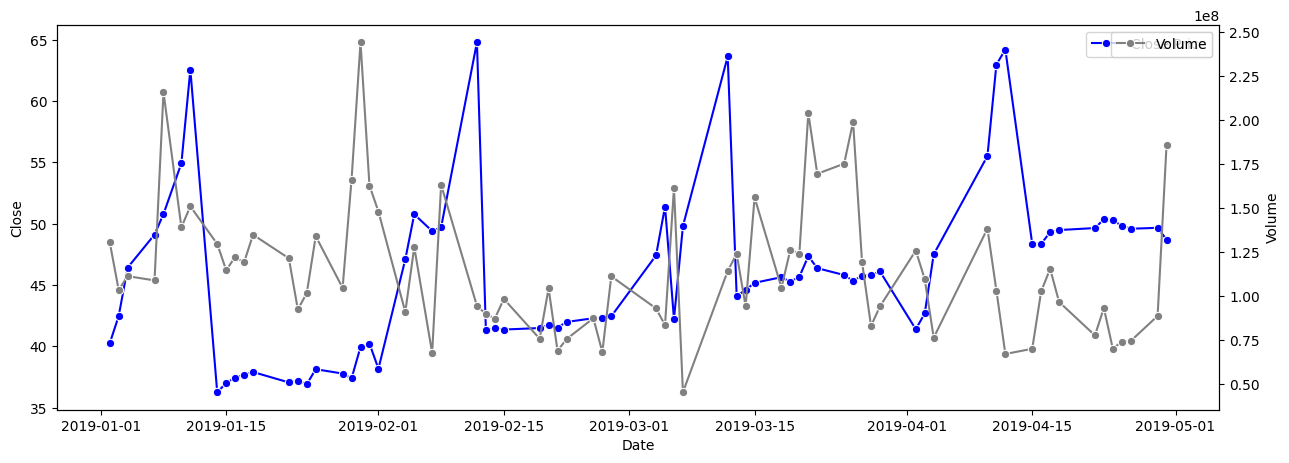

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,5))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,1));

Data Preprocessing

In [ ]:
# print the statistical summary of the 'Date' column
stock["Date"].describe()


,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


Train-test-validation Split

In [ ]:
X_train = stock[(stock['Date'] < '2019-04-01')].reset_index()    #Complete the code to select all rows where the 'Date' is before '2019-04-01'
X_val = stock[(stock['Date'] >= '2019-04-01') & (stock['Date'] < '2019-04-16')].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-01 to '2019-04-16' (excluded)
X_test = stock[stock['Date'] >= '2019-04-16'].reset_index()    #Complete the code to select all rows where the 'Date' is from '2019-04-16' till the end.


In [ ]:
#  pick the 'Label' column as the target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()


In [ ]:
#Complete the code to print the shape of X_train,X_val,X_test,y_train,y_val and y_test
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 10)
Validation data shape (21, 10)
Test data shape  (42, 10)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


In [ ]:
## Word Embeddings
# Word2Vec

In [ ]:
# Creating a list of all words in our data
words_list = [item.split(" ") for item in stock['News'].values]


In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


In [ ]:
## checking out a few word embeddings obtained using the model.
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([ 0.00322333,  0.04404621,  0.00537465,  0.0240126 , -0.00308001,
       -0.05074174,  0.03527228,  0.08434311,  0.00965142, -0.01542316,
        0.0116231 , -0.02228087,  0.00135516,  0.01209227, -0.02942883,
       -0.02539842,  0.02094441, -0.01258059, -0.00224063, -0.01352954,
       -0.02679477,  0.00283217,  0.03711281,  0.0074478 ,  0.01476089,
        0.00601035, -0.04419768,  0.00642664, -0.01831909, -0.0353931 ,
        0.01398524, -0.02157528,  0.00344714, -0.00291775, -0.00460061,
        0.01694158,  0.01721318, -0.03839242,  0.00189617, -0.01064521,
       -0.01620193, -0.00162421, -0.00177142, -0.02643573,  0.01586367,
        0.040138  ,  0.00024941,  0.01052069, -0.0017802 ,  0.02724095,
        0.02030415,  0.00530979, -0.01645484,  0.01310737, -0.0107795 ,
        0.02755068,  0.0135992 ,  0.00374589,  0.01591658, -0.00478692,
       -0.00667556, -0.01616411, -0.00018856,  0.0107388 ,  0.00650666,
        0.01453457,  0.00181734,  0.01478964, -0.02267767, -0.00

In [ ]:
# Checking the word embedding of a random word
word = "economy"
model_W2V.wv[word]

array([ 2.41816649e-03,  6.36358745e-03, -7.43456258e-06,  3.53039918e-03,
       -2.44363025e-03, -8.55309796e-03,  8.51696264e-03,  1.55342454e-02,
        4.18862182e-04, -1.38810999e-03,  2.43903743e-03, -4.51975735e-03,
        7.56345224e-04,  2.01318390e-03, -4.83628269e-03, -3.29587189e-03,
        2.23685429e-03, -3.33695975e-03, -6.17108890e-04, -3.86714912e-03,
       -1.17752247e-03,  1.67058408e-03,  5.13899187e-03,  2.29135365e-03,
        4.56756912e-03,  1.58629194e-03, -4.49519046e-03, -1.33690634e-03,
       -2.45914608e-03, -5.65257715e-03,  2.96195992e-03, -2.03655846e-03,
        3.15766223e-03, -1.71173899e-03,  2.11731138e-04,  3.54245375e-03,
        1.46540673e-03, -2.92943954e-03,  5.68243151e-04, -1.79818750e-03,
       -4.70885215e-03,  5.19602268e-04,  1.34604878e-03, -5.17230714e-03,
       -1.08335842e-03,  6.75299810e-03, -1.65353727e-03,  5.00083948e-03,
       -2.81896489e-03,  5.84250968e-03,  6.74637908e-04, -1.18428274e-04,
       -2.26579374e-03,  

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

Defining a Function for word2Vec Vectorization

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.5107393264770508


In [ ]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


Using GloVe Embeddings

In [ ]:
 # load the Stanford GloVe model
# filename = 'glove.6B.100d.txt.word2vec'
# glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

# load the Stanford GloVe model
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

from gensim.models import KeyedVectors

filename = 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)


--2025-02-11 00:23:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-02-11 00:23:49--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-02-11 00:23:50--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


Let's check out a few word embeddings.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

Defining a function for GloVe Vectorization

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
import pandas as pd
# creating a dataframe of the vectorized documents
start = time.time()
X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)]) #Complete the code to apply GloVe on 'News' column
end = time.time()
print('Time taken ', (end-start))


Time taken  30.604268074035645


In [ ]:
#  print the shapes of the final dataframes

print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape)


(286, 100) (21, 100) (42, 100)


Sentence Transformer

Defining the model

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Encoding the dataset

In [ ]:
# setting the GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
start = time.time()
X_train_st = model.encode(X_train["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_val_st = model.encode(X_val["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
X_test_st = model.encode(X_test["News"].values, show_progress_bar=True, device=device) #Complete the code to apply Sentence Transformer on 'News' column
end = time.time()
print("Time taken ",(end-start))


Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  1.6592402458190918


In [ ]:
#  print the shapes of the final dataframes

print(X_train_st.shape, X_val_st.shape, X_test_st.shape)


(286, 384) (21, 384) (42, 384)


Each news content has been converted to a 384-dimensional vector.

Sentiment Analysis

Model Evaluation Criterion

Utility Functions

Defining function for plotting confusion metrix

In [ ]:
def plot_confusion_matrix(model, predictors, target):
    """
    Plot a confusion matrix to visualize the performance of a classification model.

    Parameters:
    actual (array-like): The true labels.
    predicted (array-like): The predicted labels from the model.

    Returns:
    None: Displays the confusion matrix plot.
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    cm = confusion_matrix(target, pred)  # Compute the confusion matrix.

    plt.figure(figsize=(5, 4))  # Create a new figure with a specified size.
    label_list = [0, 1,-1]  # Define the labels for the confusion matrix.
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    # Plot the confusion matrix using a heatmap with annotations.

    plt.ylabel('Actual')  # Label for the y-axis.
    plt.xlabel('Predicted')  # Label for the x-axis.
    plt.title('Confusion Matrix')  # Title of the plot.
    plt.show()  # Display the plot.

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """
    pred = model.predict(predictors)  # Make predictions using the classifier.

    acc = accuracy_score(target, pred)  # Compute Accuracy.
    recall = recall_score(target, pred,average='weighted')  # Compute Recall.
    precision = precision_score(target, pred,average='weighted')  # Compute Precision.
    f1 = f1_score(target, pred,average='weighted')  # Compute F1-score.

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    return df_perf  # Return the DataFrame with the metrics.

Base Model - Word2Vec

In [ ]:
# Building the model

base_wv = RandomForestClassifier(random_state=42)

# Fitting on train data
base_wv.fit(X_train_wv, y_train)

RandomForestClassifier(random_state=42)

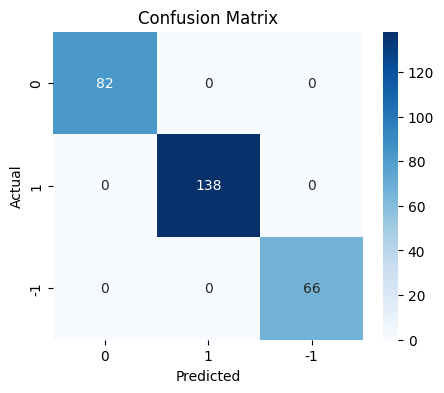

In [ ]:
plot_confusion_matrix(base_wv,X_train_wv,y_train)

The model predicted 138 corelly, 60 wrongly and 82 not sure for training

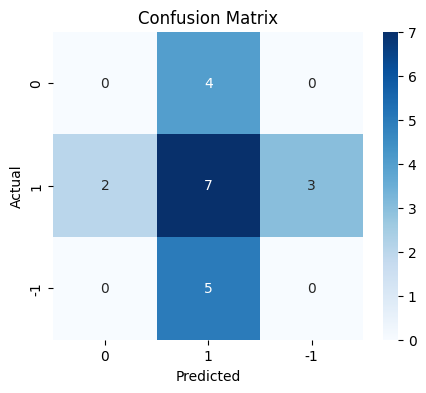

In [ ]:
plot_confusion_matrix(base_wv,X_val_wv,y_val)

The moel seems to perform poorly than training with base model

In [ ]:
#Calculating different metrics on training data
base_train_wv = model_performance_classification_sklearn(base_wv,X_train_wv,y_train)
print("Training performance:\n", base_train_wv)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
base_val_wv = model_performance_classification_sklearn(base_wv,X_val_wv,y_val)
print("Validation performance:\n",base_val_wv)

Validation performance:
    Accuracy    Recall  Precision        F1
0  0.333333  0.333333       0.25  0.285714


Base Model - GloVe

In [ ]:
#Building the model
# base_wv = RandomForestClassifier(random_state=42)
# # Fitting on train data
# fit the chosen model on the train data

base_wv.fit(X_train_gl, y_train)


RandomForestClassifier(random_state=42)

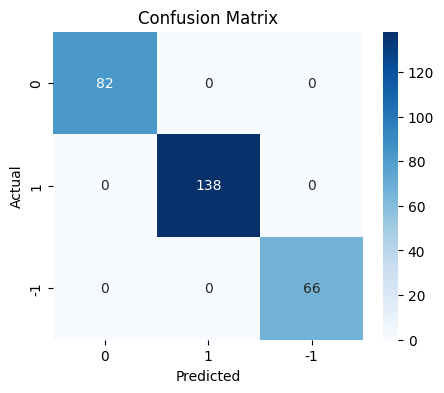

In [ ]:
#  plot the confusion matrix for the train data

plot_confusion_matrix(base_wv,X_train_gl,y_train)


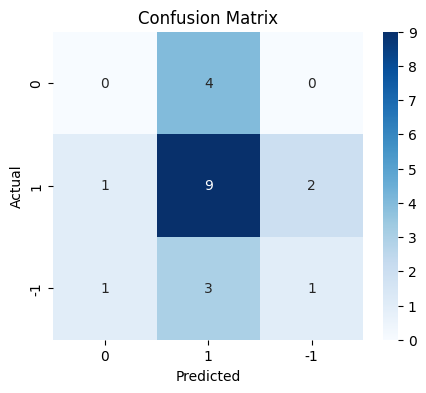

In [ ]:
# plot the confusion matrix for the validation data

plot_confusion_matrix(base_wv,X_val_gl,y_val)


In [ ]:
 #Calculating different metrics on training data
base_train_gl=model_performance_classification_sklearn(base_wv,X_train_gl,y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n", base_train_gl)


Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics on validation data
# print("Validation performance:\n",base_val_gl)

base_val_gl = model_performance_classification_sklearn(base_wv,X_val_gl,y_val)


Base Model - Sentence Transformer

In [ ]:
# prompt: # Building the model
# fit the chosen model on the train data

base_wv.fit(X_train_st, y_train)


RandomForestClassifier(random_state=42)

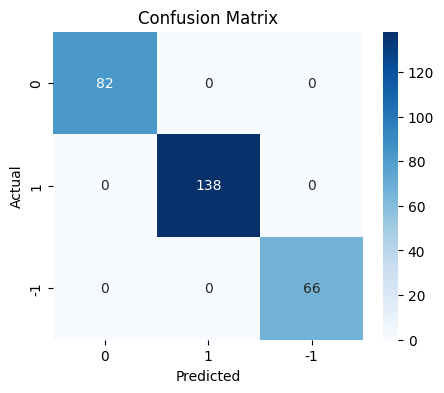

In [ ]:
#  plot the confusion matrix for the train data

plot_confusion_matrix(base_wv,X_train_st,y_train)


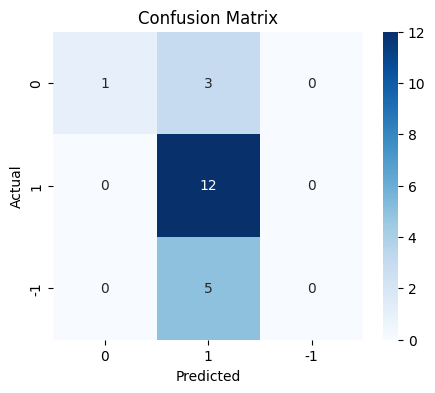

In [ ]:
# plot the confusion matrix for the validation data

plot_confusion_matrix(base_wv,X_val_st,y_val) # Changed X_val_gl to X_val_st


The model performance improved for validating data set

In [ ]:
#Calculating different metrics on training data
base_train_st=model_performance_classification_sklearn(base_wv,X_train_st,y_train) #Complete the code to compute the model performance for the training data
print("Training performance:\n", base_train_st)


Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
# Calculating the model performance for the validation data
# print("Validation performance:\n",base_val_st)

base_val_st = model_performance_classification_sklearn(base_wv,X_val_st,y_val)


Tuned Model - Word2Vec


In [ ]:
start = time.time()

# Choose the type of classifier.

tuned_wv = RandomForestClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_wv, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_wv = grid_obj.best_estimator_

Time taken  142.85421586036682


In [ ]:
# Fit the best algorithm to the data.
tuned_wv.fit(X_train_wv, y_train)


RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=9,
                       random_state=42)

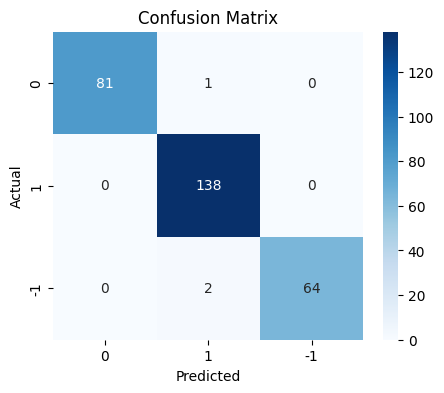

In [ ]:
plot_confusion_matrix(tuned_wv,X_train_wv,y_train)

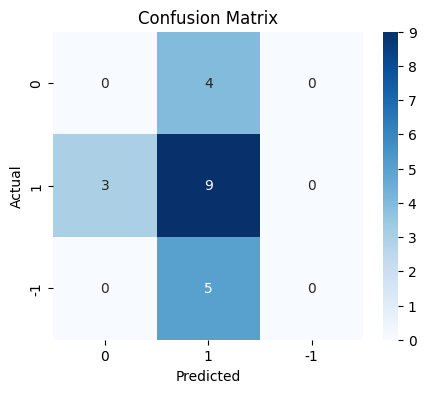

In [ ]:
plot_confusion_matrix(tuned_wv,X_val_wv,y_val)

In [ ]:
#Calculating different metrics on training data
tuned_train_wv=model_performance_classification_sklearn(tuned_wv,X_train_wv,y_train) # Use the tuned model and the correct training data
print("Training performance:\n",tuned_train_wv)

Training performance:
    Accuracy   Recall  Precision        F1
0   0.98951  0.98951   0.989734  0.989502


In [ ]:
#Calculating different metrics on validation data
tuned_val_wv = model_performance_classification_sklearn(tuned_wv,X_val_wv,y_val)
print("Validation performance:\n",tuned_val_wv)


Validation performance:
    Accuracy    Recall  Precision        F1
0  0.428571  0.428571   0.285714  0.342857


The performance improved with tuned model with accuracy of 42% and F1 of 34%

Tuned Model - GloVe

In [ ]:
start = time.time()
tuned_wv = RandomForestClassifier(random_state=42)


parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) # pass the chosen model
grid_obj = grid_obj.fit(X_train_gl, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_gl = grid_obj.best_estimator_

Time taken  84.04127144813538


In [ ]:
# fit the chosen model on the train data

tuned_gl.fit(X_train_gl, y_train)


RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=7,
                       random_state=42)

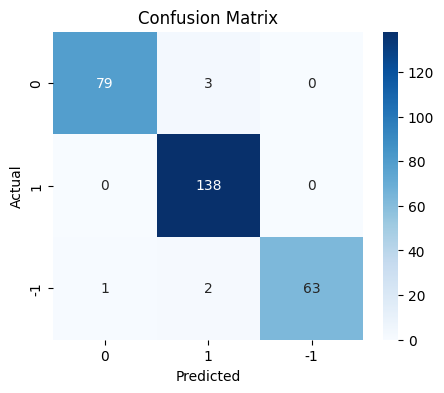

In [ ]:
# plot the confusion matrix for the train data

plot_confusion_matrix(tuned_gl,X_train_gl,y_train) # Changed base_wv to tuned_gl

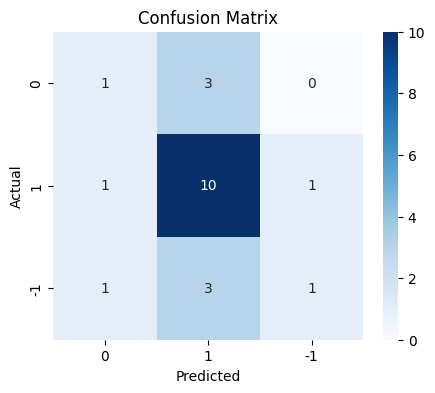

In [ ]:
# plot the confusion matrix for the validation data

plot_confusion_matrix(tuned_gl,X_val_gl,y_val)


In [ ]:
 #Calculating the model performance for the training data
# print("Training performance:\n",tuned_train_gl)

tuned_train_gl=model_performance_classification_sklearn(tuned_gl,X_train_gl,y_train)


In [ ]:
#Calculating the model performance for the validation data
# print("Validation performance:\n",tuned_val_gl)

tuned_val_gl = model_performance_classification_sklearn(tuned_gl, X_val_gl, y_val)


Tuned GloVe seems to have poor performence

Tuned Model - Sentence Transformer

In [ ]:
start = time.time()
tuned_wv = RandomForestClassifier(random_state=42)

parameters = {
    'max_depth': np.arange(3,7),
    'min_samples_split': np.arange(5,12,2),
    'max_features': ['log2', 'sqrt', 0.2, 0.4]
}

# Run the grid search
grid_obj = GridSearchCV(tuned_wv, parameters, scoring='f1_weighted',cv=5,n_jobs=-1) # pass the chosen model
grid_obj = grid_obj.fit(X_train_st, y_train)

end = time.time()
print("Time taken ",(end-start))

# Set the clf to the best combination of parameters
tuned_st = grid_obj.best_estimator_

Time taken  170.29393196105957


In [ ]:
# fit the chosen model on the train data

tuned_st.fit(X_train_st, y_train)


RandomForestClassifier(max_depth=6, max_features=0.2, min_samples_split=11,
                       random_state=42)

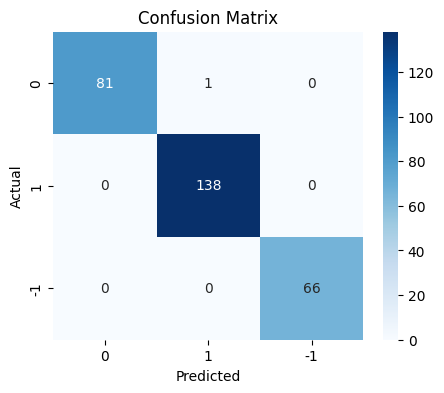

In [ ]:
#  plot the confusion matrix for the train data

plot_confusion_matrix(tuned_st,X_train_st,y_train)


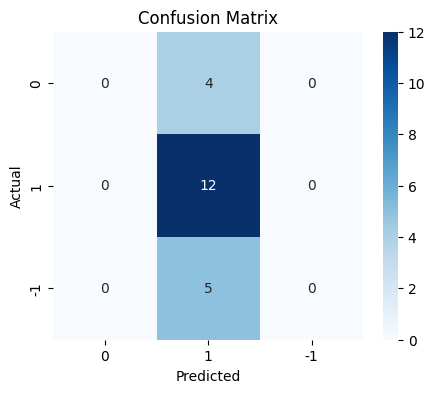

In [ ]:
#  plot the confusion matrix for the validation data

plot_confusion_matrix(tuned_st,X_val_st,y_val)

In [ ]:
#  compute the model performance for the training data
# print("Training performance:\n",tuned_train_st)

tuned_train_st=model_performance_classification_sklearn(tuned_st,X_train_st,y_train)


In [ ]:
#  compute the model performance for the validation data
# print("Validation performance:\n",tuned_val_st)

tuned_val_st = model_performance_classification_sklearn(tuned_st, X_val_st, y_val)


Model Performance Summary and Final Model Selection

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [base_train_wv.T,
     base_train_gl.T,
     base_train_st.T,
     tuned_train_wv.T,
     tuned_train_gl.T,
     tuned_train_st.T,
    ],axis=1
)

models_train_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,1.0,1.0,1.0,0.989510,0.979021,0.996503
Recall,1.0,1.0,1.0,0.989510,0.979021,0.996503
Precision,1.0,1.0,1.0,0.989734,0.979545,0.996529
F1,1.0,1.0,1.0,0.989502,0.978968,0.996499


For training performnce comparison based on F1 score and recall, Sentence transformer is the best performance model follow by word2vec and leat is GloVe.

In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [base_val_wv.T,
     base_val_gl.T,
     base_val_st.T,
     tuned_val_wv.T,
     tuned_val_gl.T,
     tuned_val_st.T,
     ],axis=1
)

models_val_comp_df.columns = [
    "Base Model (Word2Vec)",
    "Base Model (GloVe)",
    "Base Model (Sentence Transformer)",
    "Tuned Model (Word2Vec)",
    "Tuned Model (GloVe)",
    "Tuned Model (Sentence Transformer)",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Base Model (Word2Vec),Base Model (GloVe),Base Model (Sentence Transformer),Tuned Model (Word2Vec),Tuned Model (GloVe),Tuned Model (Sentence Transformer)
Accuracy,0.333333,0.476190,0.619048,0.428571,0.571429,0.571429
Recall,0.333333,0.476190,0.619048,0.428571,0.571429,0.571429
Precision,0.250000,0.400794,0.533333,0.285714,0.539683,0.326531
F1,0.285714,0.426871,0.504762,0.342857,0.530612,0.415584


For Validation performance F1score, GloVe is the best performing model , follow bysentence transformer and least is word2ved in tuned model. Although the performance of base model is different, the F1score for sentence tranformer is the best while GloVe is the sencond and word2 vec peformed last

Model Performance Check on Test Data


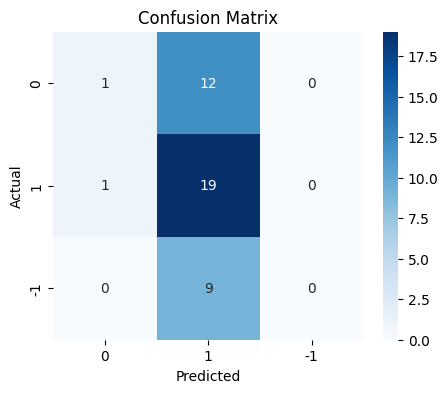

In [ ]:
#  plot the confusion matrix for the final model and test data

plot_confusion_matrix(tuned_st, X_test_st, y_test)


In [ ]:
# computING the final model's performance for the test data
# print("Test performance for the final model:\n",final_model_test)

final_model_test = model_performance_classification_sklearn(tuned_st, X_test_st, y_test)


Weekly News Summarization


In [ ]:
# Installation for GPU llama-cpp-python
#  GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 165.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 182.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 161.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 173.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.2.2 which is incompatible.
pytensor 2.26.4 requires numpy<2,>=1.17.0, but you have numpy 2.2.2 which is incompatible.
langchain 0.3.17 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.2 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but 

In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the library for data manipulation
import pandas as pd

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

Loading the data

In [ ]:
stock_news = pd.read_csv('/content/drive/MyDrive/stock_news.csv')

In [ ]:
data = stock_news.copy()

Loading the model

* Mistral pretrained model
* Llama Pretrained model



In [ ]:


model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"
model_path = hf_hub_download(
    repo_id=model_name_or_path, # mentioning the repo_id
    filename=model_basename # mentioning the filename
)


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
# runtime is connected to GPU.
llm = Llama(
    model_path=model_path, # Path to the model
    n_gpu_layers=100, #Number of layers transferred to GPU
    n_ctx=4500, #Context window
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


Aggregating the data weekly

In [ ]:
data["Date"] = pd.to_datetime(data['Date'])  # Converting the 'Date' column to datetime format.

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))


In [ ]:
# Aggregate the grouped data on a weekly basis:
# concatenate 'content' values into a single string separated by ' || '.
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


Summarization

Note:

The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

Role: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role
Example: You are an expert data analyst specializing in news content analysis.

Task: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective
Example: Analyze the provided news headline and return the main topics contained within it.

Output Format: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output
Example: Return the output in JSON format with keys as the topic number and values as the actual topic.

Full Prompt Example:

You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.

Sample Output:

{"1": "Politics", "2": "Economy", "3": "Health" }

In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

In [ ]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

Defining the response function

In [ ]:

def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=200, # set the maximum number of tokens the model should generate for this task.
      temperature=0.1, # set the value for temperature.
      top_p=0.95, #set the value for top_p
      top_k=40, # set the value for top_k
      echo=False,
    )
    final_output = model_output["choices"][0]["text"]
    return final_output


In [ ]:
## Checking the model output on a sample
news = data_1.loc[0, 'News']

In [ ]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [ ]:
#  define the prompt
prompt = """
    Summarize the given news articles into a concise summary, focusing on the key information and insights.  Ensure that the summary is well-structured and easy to understand.  The output should be in JSON format with the following keys: 'summary' for the summary text and 'sentiment' for the overall sentiment of the news (positive, negative, or neutral).
"""


Observations


*  Prompt helps guide model with desired output, the above prompt could be fine tuned with specifics instructions tailored to desired output expected from the newsfeed.



In [ ]:
%%time
summary = response_mistral_1(prompt, news)
print(summary)

 {
         "summary": "Apple's Q1 revenue warning led to a significant decline in Apple's stock price and negative impacts on related suppliers. Weak demand in China and fewer iPhone upgrades were cited as reasons for the revenue shortfall. The tech sector experienced broader declines, with indices such as Nasdaq 100 being affected. Long-term U.S. Treasury yields dropped to their lowest levels in nearly a year due to concerns about the global economy. Apple's underperformance triggered risk aversion mood in markets and caused volatility in currencies like the Japanese yen and Australian dollar. The slowing Chinese economy and trade tensions were also blamed for lower revenue forecasts from other companies, leading to losses for suppliers like Hon Hai Precision Industry Co Ltd, Taiwan Semiconductor Manufacturing Company, and LG Innotec. Gold prices reached their highest level since mid-June due to invest
CPU times: user 18.7 s, sys: 5.15 s, total: 23.9 s
Wall time: 25.4 s


Checking the model output on the weekly data

In [ ]:
%%time
data_1['Key Events'] = data_1['News'].progress_apply(lambda x: response_mistral_1(prompt,x))

100%|██████████| 18/18 [03:59<00:00, 13.31s/it]

CPU times: user 3min 30s, sys: 27 s, total: 3min 57s
Wall time: 3min 59s


In [ ]:
#  print the first 5 rows of the 'Key Events' column
data_1["Key Events"].head()

,Key Events
0,"{\n ""summary"": ""Apple's Q1 revenue wa..."
1,"{\n ""summary"": ""Sprint and Samsung, a..."
2,"{\n ""summary"": ""U.S. stocks experienc..."
3,"{\n ""summary"": ""Swiss National Bank g..."
4,"{\n ""summary"": ""Caterpillar reported ..."


Formatting the model output

In [ ]:
data_1['model_response_parsed'] = data_1['Key Events'].apply(extract_json_data)
data_1.head()

         "summary": "Sprint and Samsung, along with rival Verizon, plan to release 5G smartphones in nine U.S. cities this summer. AMS, an Austrian tech company, has developed a new light and infrared proximity sensor for smartphones, reducing the required space for sensors. Deutsche Bank upgraded Universal Music Group's valuation to €29 billion. Amazon's stock is predicted to surge by over 20% this year. AMS partners with Chinese software maker Face to develop new 3D facial recognition features for smartphones. Geely forecasts flat sales for 2019 due to economic slowdown and cautious consumers. China is making efforts to address U.S. concerns in the ongoing trade war but cannot dismantle its governance model. Stock index futures indicate a slightly lower open on Wall Street, with investors remaining cautious amid lack of progress in U.S.-
         "summary": "U.S. stocks experienced declines on Monday due to concerns over a global economic slowdown, particularly in China, where export

,Date,News,Key Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""summary"": ""Apple's Q1 revenue wa...",{'summary': 'Apple's Q1 revenue warning led to...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""summary"": ""Sprint and Samsung, a...",{}
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""summary"": ""U.S. stocks experienc...",{}
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""summary"": ""Swiss National Bank g...",{}
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""summary"": ""Caterpillar reported ...",{}


In [ ]:
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

,summary,sentiment
0,Apple's Q1 revenue warning led to a significan...,negative
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [ ]:
final_output = pd.concat([data_1.reset_index(drop=True),model_response_parsed],axis=1)
final_output.drop(['Key Events','model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week End Date', 'News', 'Week Positive Events', 'Week Negative Events']

final_output.head()

,Week End Date,News,Week Positive Events,Week Negative Events
0,2019-01-06,The tech sector experienced a significant dec...,Apple's Q1 revenue warning led to a significan...,negative
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,NaN,NaN
2,2019-01-20,The U.S. stock market declined on Monday as c...,NaN,NaN
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",NaN,NaN
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,NaN,NaN


Conclusions and Recommendations

* The project has been executed with combining NLP sentiment and semantics analysis to providing sumaries of text from webscrapped news feed data


*  A base model was built and three model were also built, the word2vec, GloVe and sentence transformer.

*  For text summerization pretrained llama model was deployed from huggingface liberary.

* The result is useful for descision makers to quickly leverage newsfeed information from sentiment and semantic analysis in taking a strategic decision on stock performance and use it to guage market prediction.

* This is a useful tool to augument recommedation system for stock market predictive  analytics and optimization of investment portfolio. There are many usecases for NLP/LLMs in finacial space and other sector.
Sematic and semtiment analyis helps in sumerization of vast document such as legal and clinical records. Finacial excutive have many activities on their plate, leveraging AI/NLP could free up more time by sumerising text and use prompt to get information needed to support invetment descision.

*  The model could be improved by fine tuning and optimization of prompt to achive guided outcome.








